**Aviso:** Realize a atividade prática antes de responder o questionário, pois o mesmo faz algumas questões sobre a prática.

## Dataset
O Dataset cloud possui 6 atributos preditivos (period, seeded, season, NC, SC, NWC) e um atributo alvo (Target).

Estes dados foram recolhidos numa experiência de sementeira de nuvens na Tasmânia entre meados de 1964 e Janeiro de 1971. Este é uma versão pré-processada do dataset disponível em https://www.openml.org/data/download/3647/dataset_2196_cloud.arff

 
## Atividades práticas
 - Execute 10 vezes o 5-folds CV utilizando diferentes valores para o random_state e calcule o R2 médio destas execuções, para o algoritmo de Regressão Linear.
 - Utilizando todo o conjunto de dados para induzir um modelo Lasso com alpha=1, identifique quantos atributos tiveram seus respectivos coeficientes zerados.
 - Utilizando todo o conjunto de dados para induzir um modelo de Regressão Linear, identifique os valores dos coeficientes obtidos para cada atributo.
 - Divida o dataset em 80%,20% e utilizando as mesmas partições compare o desempenho dos algoritmos Regressão Linear, Lasso e Ridge usando a medida RMSE.
 - Utilizando a técnica de Leave-one-out calcule o valor do erro médio absoluto (MAE) para o algoritmo de Regressão Linear

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, LeaveOneOut

In [ ]:
df = pd.read_csv('cloud.csv')
display(df.head(8))

x = df.drop(columns=['Target'])
y = df['Target']
display(x.head(8))

,period,seeded,season,NC,SC,NWC,Target
0,1.0,1,-0.5,1.65,1.80,3.33,1.69
1,2.0,0,-0.5,1.09,0.79,1.59,0.74
2,3.0,1,-1.0,2.39,0.36,2.06,0.81
3,4.0,0,-1.0,2.96,1.27,4.05,1.44
4,5.0,1,-1.0,4.16,2.16,6.00,2.48
5,6.0,0,-1.0,2.76,0.87,4.17,0.84
6,7.0,0,-1.0,1.08,0.85,3.45,0.37
7,8.0,1,-1.0,0.26,0.47,0.90,0.37


,period,seeded,season,NC,SC,NWC
0,1.0,1,-0.5,1.65,1.80,3.33
1,2.0,0,-0.5,1.09,0.79,1.59
2,3.0,1,-1.0,2.39,0.36,2.06
3,4.0,0,-1.0,2.96,1.27,4.05
4,5.0,1,-1.0,4.16,2.16,6.00
5,6.0,0,-1.0,2.76,0.87,4.17
6,7.0,0,-1.0,1.08,0.85,3.45
7,8.0,1,-1.0,0.26,0.47,0.90


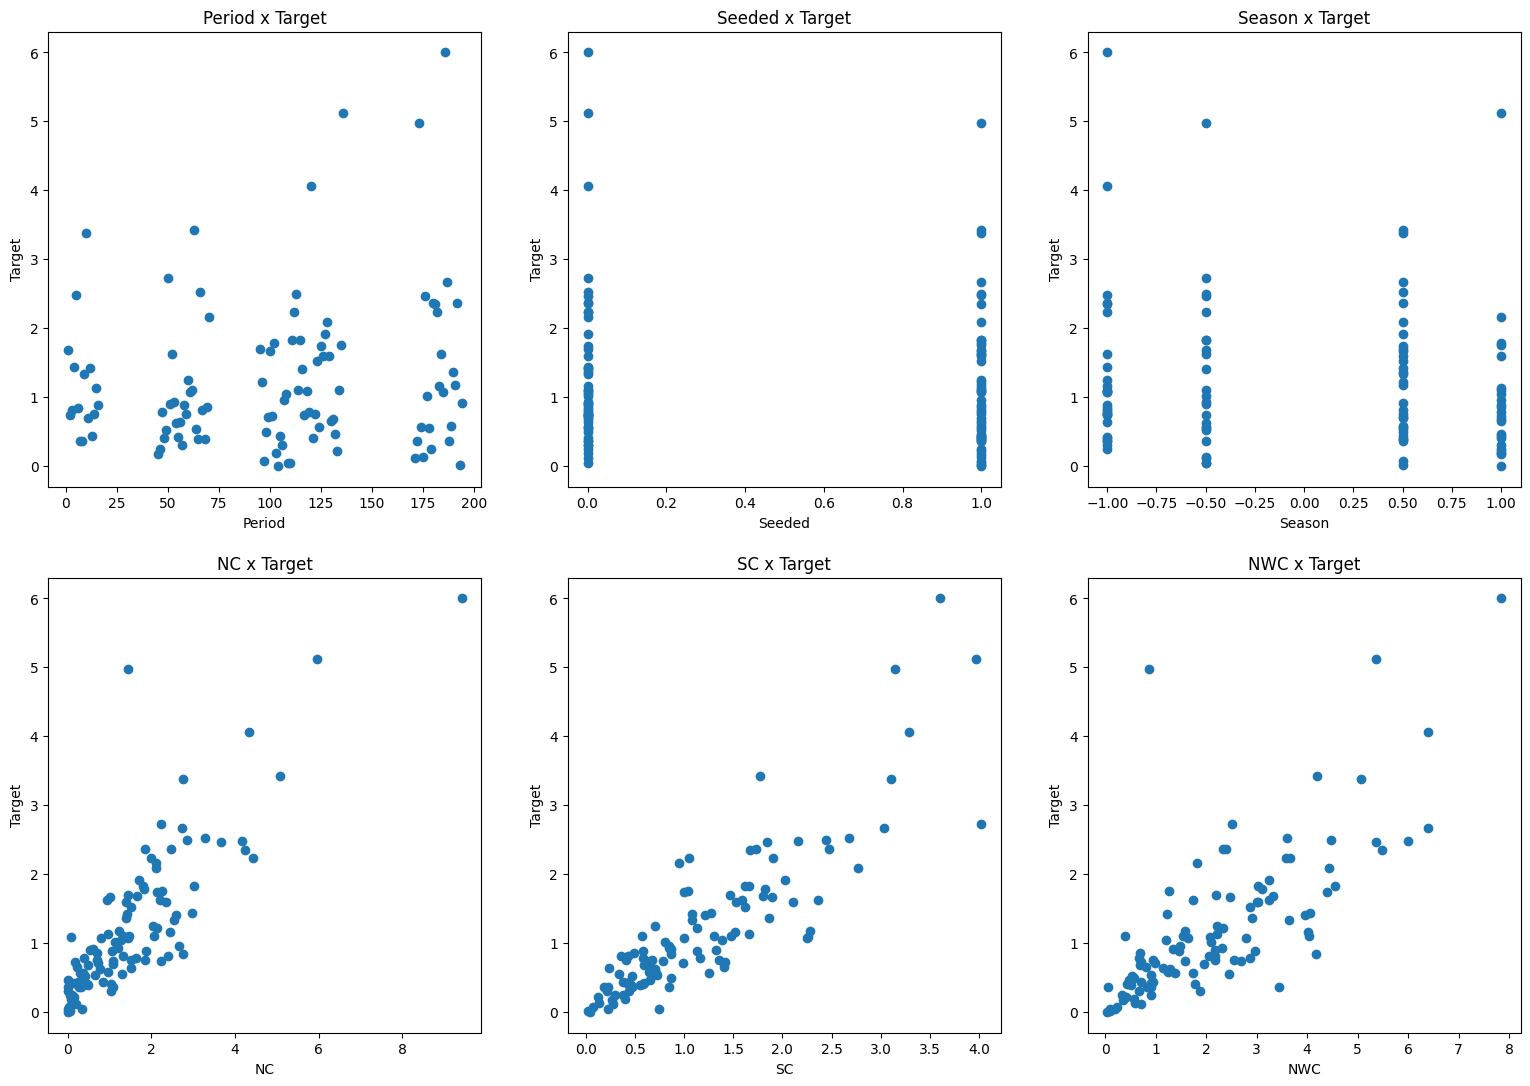

In [19]:
plt.figure(figsize=(19,13))

plt.subplot(2, 3, 1)
plt.scatter(x=df['period'], y=y)
plt.title('Period x Target')
plt.xlabel('Period')
plt.ylabel('Target')

plt.subplot(2, 3, 2)
plt.scatter(x=df['seeded'], y=y)
plt.title('Seeded x Target')
plt.xlabel('Seeded')
plt.ylabel('Target')


plt.subplot(2, 3, 3)
plt.scatter(x=df['season'], y=y)
plt.title('Season x Target')
plt.xlabel('Season')
plt.ylabel('Target')


plt.subplot(2, 3, 4)
plt.scatter(x=df['NC'], y=y)
plt.title('NC x Target')
plt.xlabel('NC')
plt.ylabel('Target')


plt.subplot(2, 3, 5)
plt.scatter(x=df['SC'], y=y)
plt.title('SC x Target')
plt.xlabel('SC')
plt.ylabel('Target')


plt.subplot(2, 3, 6)
plt.scatter(x=df['NWC'], y=y)
plt.title('NWC x Target')
plt.xlabel('NWC')
plt.ylabel('Target')

plt.show()

##### Execute 10 vezes o 5-folds CV utilizando diferentes valores para o random_state e calcule o R2 médio destas execuções, para o algoritmo de Regressão Linear.

In [16]:
lr_r2_scores = []
lr_r2_means = []
for i in range(1, 11):
  kf = KFold(n_splits=5, shuffle=True, random_state=i)
  ln_r2_score = cross_val_score(LinearRegression(), x, y, cv=kf, scoring='r2')
  lr_r2_scores.append(ln_r2_score)
  lr_r2_mean = ln_r2_score.mean()
  lr_r2_means.append(lr_r2_mean)
  print("Média de scores do fold atual: {}".format(lr_r2_mean))
  
scores_df = pd.DataFrame(lr_r2_scores, columns=['k-1', 'k-2', 'k-3', 'k-4', 'k-5'])
scores_df['mean'] = lr_r2_means

general_mean = np.mean(lr_r2_means)
print("\nMédia de todos os r-scores: {}".format(general_mean))

Média de scores do fold atual: 0.8217355683898528
Média de scores do fold atual: 0.8013696751893041
Média de scores do fold atual: 0.8157356278247262
Média de scores do fold atual: 0.8617179213959881
Média de scores do fold atual: 0.814957009352437
Média de scores do fold atual: 0.8379243876657441
Média de scores do fold atual: 0.8558545025918992
Média de scores do fold atual: 0.8003186263058615
Média de scores do fold atual: 0.7959755003650896
Média de scores do fold atual: 0.8032850687603725

Média de todos os r-scores: 0.8208873887841275


##### Utilizando todo o conjunto de dados para induzir um modelo Lasso com alpha=1, identifique quantos atributos tiveram seus respectivos coeficientes zerados.

In [ ]:
l_model = Lasso(alpha=1, random_state=37)
l_model.fit(x, y)
y_pred = l_model.predict(x)
print("Mean Squared Score: {}".format(mean_squared_error(y, y_pred)))
print("R2 Score: {}".format(r2_score(y, y_pred)))
print("Intercept: {}".format(l_model.intercept_))
print("Coeficientes: {}".format(l_model.coef_))

Mean Squared Ecore: 0.8303237936545783
R2 Score: 0.2777098995782318
Intercept: 0.773032970855124
Coeficientes: [ 0.00246382 -0.         -0.          0.10093995  0.          0.02722853]


##### Utilizando todo o conjunto de dados para induzir um modelo de Regressão Linear, identifique os valores dos coeficientes obtidos para cada atributo.

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred = lr_model.predict(x)
print("Mean Squared Score: {}".format(mean_squared_error(y, y_pred)))
print("R2 Score: {}".format(r2_score(y, y_pred)))
print("Intercept: {}".format(lr_model.intercept_))
print("Coeficientes: {}".format(lr_model.coef_))

Mean Squared Ecore: 0.128769547773909
R2 Score: 0.8879846990973079
Intercept: -0.1326054533606127
Coeficientes: [ 5.90225593e-04  3.30711240e-02  5.80051846e-02  4.78715219e-01
  7.10376709e-01 -1.30329221e-01]


##### Divida o dataset em 80%,20% e utilizando as mesmas partições compare o desempenho dos algoritmos Regressão Linear, Lasso e Ridge usando a medida RMSE.

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print("Mean Squared Score: {}".format(mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Score: {}".format(root_mean_squared_error(y_test, y_pred)))
print("R2 Score: {}".format(r2_score(y_test, y_pred)))
print("Intercept: {}".format(lr_model.intercept_))
print("Coeficientes: {}".format(lr_model.coef_))

l_model = Lasso(alpha=1, random_state=7)
l_model.fit(x_train, y_train)
y_pred = l_model.predict(x_test)
print("\nMean Squared Score: {}".format(mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Score: {}".format(root_mean_squared_error(y_test, y_pred)))
print("R2 Score: {}".format(r2_score(y_test, y_pred)))
print("Intercept: {}".format(l_model.intercept_))
print("Coeficientes: {}".format(l_model.coef_))

r_model = Ridge(alpha=1, random_state=7)
r_model.fit(x_train, y_train)
y_pred = r_model.predict(x_test)
print("\nMean Squared Score: {}".format(mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Score: {}".format(root_mean_squared_error(y_test, y_pred)))
print("R2 Score: {}".format(r2_score(y_test, y_pred)))
print("Intercept: {}".format(r_model.intercept_))
print("Coeficientes: {}".format(r_model.coef_))

Mean Squared Score: 0.13621179695421093
Root Mean Squared Score: 0.36906882414288383
R2 Score: 0.8217599795881307
Intercept: -0.13564405710990424
Coeficientes: [ 0.0011431  -0.00124984  0.01890207  0.47770134  0.70244551 -0.1389403 ]

Mean Squared Score: 0.5761214373165917
Root Mean Squared Score: 0.7590266380810305
R2 Score: 0.24611598229230913
Intercept: 0.680821633258478
Coeficientes: [ 0.0029112 -0.        -0.         0.1815849  0.         0.       ]

Mean Squared Score: 0.13699087836216783
Root Mean Squared Score: 0.3701227882232703
R2 Score: 0.8207405121913133
Intercept: -0.13476955562471837
Coeficientes: [ 1.16718363e-03 -5.25769313e-04  2.16661004e-02  4.69592439e-01
  6.82458309e-01 -1.23930505e-01]


##### Utilizando a técnica de Leave-one-out calcule o valor do erro médio absoluto (MAE) para o algoritmo de Regressão Linear

In [82]:
loo = LeaveOneOut()
l_model = LinearRegression()

predictions = []
for i, (train_index, test_index) in enumerate(loo.split(X=x, y=y)):
  x_train = x.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test = x.iloc[test_index]
  y_test = y.iloc[test_index]
  
  l_model.fit(x_train, y_train)
  predictions.append(l_model.predict(x_test))

print("MAE: {}".format(mean_absolute_error(y_test, predictions[0])))
print("MSE: {}".format(mean_squared_error(y_test, predictions[0])))
print("RMSE: {}".format(root_mean_squared_error(y_test, predictions[0])))
print("R2 Score: {}", r2_score(y_test, predictions[0]))

MAE: 0.5734007318531938
MSE: 0.3287883992897783
RMSE: 0.5734007318531938
R2 Score: {} nan


/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
